In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
!hostname

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

pcn-4-05


In [2]:
datapath="/mnt/home/bbhattarai/B3-N/"
#freq_datapath="/mnt/home/bbhattarai/freq_data/"

In [3]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
datafilename="0_to_720_B3-N_saved_barangles_combined.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

720


In [4]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
#print(len(times))
time=list()
for i in range(720): #goto len(times) if you want to seek for all times that are calculated so far
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
print(len(time))

720


# Plotting bar angle (in radians) vs time

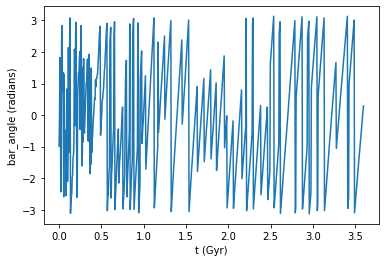

In [5]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,bangle_radians)
plotname="bar_angle_vs_time.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

# plotting in degrees

[ -56.500004     -7.499992    104.49999      67.50001    -139.49998
 -136.49998     134.49998     162.49998      44.499996     77.49999
   28.500006   -148.49998      74.49999     -87.49999     -68.49999
  -30.5         -27.499998   -146.5          21.49999      47.5
 -120.5         -70.50001     122.5         -67.49999     -32.499996
  141.49998     176.5        -178.49998    -158.49997    -149.49998
 -141.49998    -113.499985   -107.49999     -75.5         -73.49999
  -54.499996    119.499985    115.5         -19.499992    145.49998
  168.49998      17.500013   -149.5        -135.5          35.500008
   59.500004     77.50001      75.49999     102.49999     115.5
  -26.499998    129.5         162.49998      64.5         -92.5
  -72.50001      86.49999     -48.499996    102.499985    -24.500004
  -32.500008     -7.5000076    17.499998     37.500008     56.49999
   60.499996     72.49999     101.499985      0.49999237  -47.49999
   99.499985    110.5          38.499996   -106.5        

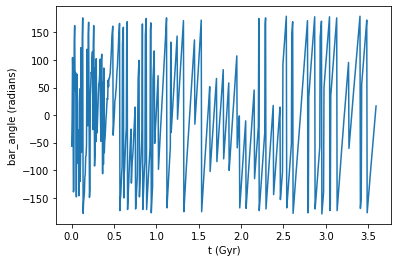

In [9]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
#bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,all_bangles)
plotname="bar_angle_vs_time.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
print(all_bangles)

# Calculating pattern speed using numpy functions

[ 4.90000114e+01  1.11999985e+02 -3.69999847e+01 -2.07000000e+02
  3.00000000e+00  2.70999969e+02  2.80000000e+01 -1.17999985e+02
  3.29999962e+01 -4.89999847e+01 -1.76999985e+02  2.22999969e+02
 -1.61999985e+02  1.90000000e+01  3.79999924e+01  3.00000191e+00
 -1.19000000e+02  1.67999985e+02  2.60000095e+01 -1.68000000e+02
  4.99999924e+01  1.93000000e+02 -1.90000000e+02  3.49999962e+01
  1.73999985e+02  3.50000153e+01 -3.55000000e+02  2.00000153e+01
  8.99998474e+00  8.00000000e+00  2.80000000e+01  5.99999237e+00
  3.19999924e+01  2.00000763e+00  1.89999962e+01  1.73999985e+02
 -3.99998474e+00 -1.35000000e+02  1.64999969e+02  2.30000000e+01
 -1.50999969e+02 -1.67000015e+02  1.40000000e+01  1.71000000e+02
  2.39999962e+01  1.80000038e+01 -2.00001526e+00  2.70000000e+01
  1.30000076e+01 -1.42000000e+02  1.56000000e+02  3.29999847e+01
 -9.79999847e+01 -1.57000000e+02  1.99999924e+01  1.59000000e+02
 -1.34999985e+02  1.50999985e+02 -1.26999985e+02 -8.00000381e+00
  2.50000000e+01  2.50000

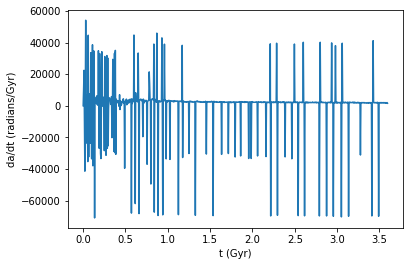

In [12]:
d_angle=np.diff(all_bangles)
print(d_angle)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically


# Converting all angles to positive

In [8]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=360+a[i]
print(a)
t=time

[303.5        352.5        104.49999     67.50001    220.50002
 223.50002    134.49998    162.49998     44.499996    77.49999
  28.500006   211.50002     74.49999    272.5        291.5
 329.5        332.5        213.5         21.49999     47.5
 239.5        289.5        122.5        292.5        327.5
 141.49998    176.5        181.50002    201.50003    210.50002
 218.50002    246.50002    252.5        284.5        286.5
 305.5        119.499985   115.5        340.5        145.49998
 168.49998     17.500013   210.5        224.5         35.500008
  59.500004    77.50001     75.49999    102.49999    115.5
 333.5        129.5        162.49998     64.5        267.5
 287.5         86.49999    311.5        102.499985   335.5
 327.5        352.5         17.499998    37.500008    56.49999
  60.499996    72.49999    101.499985     0.49999237 312.5
  99.499985   110.5         38.499996   253.5         59.499996
 270.5         85.5        291.5        312.5        320.50003
 337.5        353.5   

352.500000 - 303.500000 = 49.000000
104.499992 - 352.500000 = -248.000000
da <0 found
da is now 111.99999237060547
67.500008 - 104.499992 = -36.999985
da <0 found
da is now 323.00001525878906
d_a > 180 found
da is now:  143.00001525878906
220.500015 - 67.500008 = 153.000000
223.500015 - 220.500015 = 3.000000
134.499985 - 223.500015 = -89.000031
da <0 found
da is now 270.9999694824219
d_a > 180 found
da is now:  90.99996948242188
162.499985 - 134.499985 = 28.000000
44.499996 - 162.499985 = -117.999985
da <0 found
da is now 242.0000114440918
d_a > 180 found
da is now:  62.0000114440918
77.499992 - 44.499996 = 32.999996
28.500006 - 77.499992 = -48.999985
da <0 found
da is now 311.00001335144043
d_a > 180 found
da is now:  131.00001335144043
211.500015 - 28.500006 = 183.000015
d_a > 180 found
da is now:  3.0000152587890625
74.499992 - 211.500015 = -137.000031
da <0 found
da is now 222.9999771118164
d_a > 180 found
da is now:  42.999977111816406
272.500000 - 74.499992 = 198.000000
d_a > 180

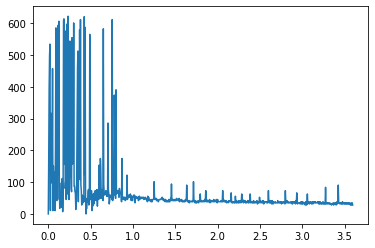

In [13]:
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("%f - %f = %f"%(a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found")
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found")
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)


# Fixing angles

Plot generated and saved to file:  da_dt_vs_time_B4_new.jpg


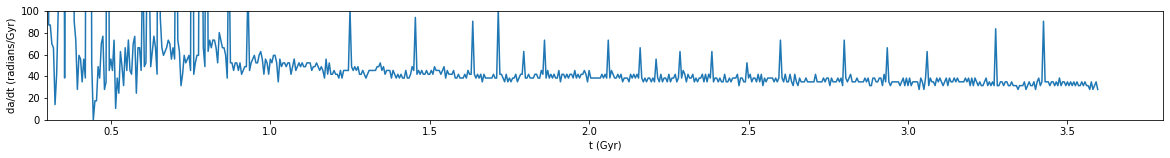

In [30]:
#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4=plt.figure(figsize=(20,2))
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
ax.set_ylim(0,100)
ax.set_xlim(0.3,3.8)
plotname="da_dt_vs_time_B4_new.jpg"
print("Plot generated and saved to file: ",plotname)
#fig4.savefig(plotname,bbox_inches="tight")
#plt.tight_layout()
plt.show()

# Saving the pattern speed (frequency) of the bar in pickle file

In [103]:
'''
datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
dadtz_kms_kpc=dadtz*3.08567758/3.15576
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(dadtz_kms_kpc, output)

'''

337
[0.00000000e+00 3.43996246e+01 3.52236189e+01 3.30402432e+01
 3.65906015e+01 4.47825103e+01 3.33086185e+01 4.50562916e+01
 1.03764344e+01 5.46042158e+00 1.06495088e+01 1.63839848e+00
 2.51179576e+01 1.09225287e+00 5.46119813e-01 2.18420683e+01
 3.98673647e+01 7.64579634e+00 4.69596915e+01 1.63838931e+00
 4.64208952e+01 4.42349988e+01 9.68591228e-06 4.50527651e+01
 4.45059722e+01 3.82265893e+01 4.42329307e+01 4.15031517e+01
 4.12365716e+01 4.06833601e+01 3.98648716e+01 3.90457266e+01
 4.34137993e+01 3.60422180e+01 3.60416493e+01 4.06903729e+01
 3.76804969e+01 3.63146901e+01 3.98648743e+01 3.54961137e+01
 3.82259925e+01 3.68613474e+01 3.54961238e+01 3.46818551e+01
 3.82265971e+01 3.65882832e+01 3.38573251e+01 3.57691545e+01
 3.44039321e+01 3.60416512e+01 3.44039277e+01 3.33112193e+01
 3.41362180e+01 3.74074478e+01 3.19460092e+01 3.65883057e+01
 3.16734614e+01 3.24920894e+01 3.60422253e+01 3.22195376e+01
 3.16779202e+01 3.44039321e+01 3.22195518e+01 3.19460054e+01
 3.44039295e+01 3.08

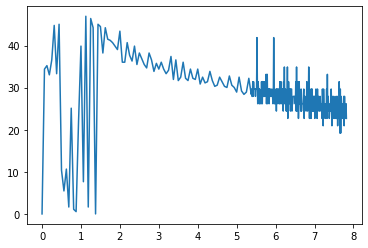

In [109]:
datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
print(len(ps))
print(ps)

plt.plot(time,ps)

In [31]:
print(time)

[0.         0.00500641 0.01000304 0.01500945 0.02000608 0.02500272
 0.03000913 0.03500478 0.04000141 0.04500685 0.05000348 0.05500989
 0.06000554 0.06500217 0.07000858 0.07500424 0.08000185 0.08500044
 0.0900088  0.09500739 0.10000598 0.10500457 0.11000315 0.11500174
 0.12000033 0.12500869 0.13000728 0.13500587 0.14000544 0.14500402
 0.15000261 0.1550012  0.16000565 0.16501011 0.17000381 0.17500728
 0.18000098 0.18500446 0.19000794 0.19500261 0.20000609 0.20500957
 0.21000326 0.21500674 0.22000142 0.22500489 0.23000837 0.23500207
 0.24000555 0.24501    0.2500037  0.25500718 0.26000088 0.26500435
 0.27000881 0.27500251 0.28000598 0.28500946 0.29000316 0.29500663
 0.30000131 0.30500479 0.31000826 0.31501174 0.32001522 0.32500989
 0.33001337 0.33501685 0.34001055 0.34501402 0.35001848 0.35501218
 0.36001565 0.36500935 0.37001283 0.37501728 0.38001098 0.38501446
 0.39001794 0.39501163 0.40001511 0.40500979 0.41001326 0.41501674
 0.42001044 0.42501392 0.43001837 0.43501207 0.44001555 0.4450